<a href="https://colab.research.google.com/github/micsung/data_analysis_n_application/blob/main/20211201%E8%B3%87%E6%96%99%E6%8E%A2%E5%8B%98Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd
import pandas as pd

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 0), (2, 3), (2, 4), (3, 1), (4, 2), (4, 5)]
{0: 0.09954133426295307, 1: 0.25362193929605986, 2: 0.22748603559966085, 3: 0.20733129232624323, 4: 0.09954133426295307, 5: 0.07739138059616686, 6: 0.03508668365596304}
Justin Biber 0.09954133426295307
Pixar 0.25362193929605986
Ellen DeGeneres 0.22748603559966085
Disney 0.20733129232624323
Discovery 0.09954133426295307
ed sheeran 0.07739138059616686
gigi hadid 0.03508668365596304


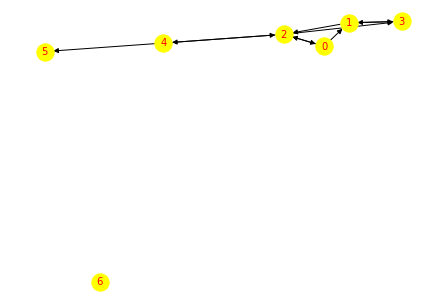

In [ ]:
import pandas as pd

df = pd.read_csv("ig.csv")
n = 7
# created a directed graph
G = nx.DiGraph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

for i in range(0,n):
  K3 = nx.Graph([(0, i)])
  G.add_nodes_from(K3)

 
for i in range(0,n):
  for j in range(0,n):
    if df.iloc[i,j]==1 and i!=j:
      G.add_edges_from([(i, j)])
print(G.edges)

pagerank=nx.pagerank(G)
#display the order
print(pagerank)

for i in range(0,len(pagerank)):
  print(df.columns[i],pagerank[i])

#draw a graph
nx.draw(G,with_labels=True,font_color='red',font_size=10,node_color='yellow')
#plot a graph
plt.show()


In [ ]:
%load_ext rpy2.ipython

In [ ]:
!pip install pyldavis
!pip install pandas --upgrade
from io import BytesIO
from zipfile import ZipFile
import urllib.request


data_url = "https://onedrive.live.com/download?cid=73E98E6C37033B6C&resid=73E98E6C37033B6C%214986&authkey=AM5kzKwVCrULOZU"


urllib.request.urlretrieve(data_url, "file.zip")



('file.zip', <http.client.HTTPMessage at 0x7feb89350710>)

In [ ]:
with ZipFile("file.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

In [ ]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('/content/papers.csv')
# Print head
print(papers.columns)

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')


In [ ]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
print(papers)

      year  ...                                         paper_text
6767  2017  ...  EEG-GRAPH: A Factor-Graph-Based Model for\nCap...
2555  2007  ...  A Bayesian LDA-based model for semi-supervised...
3145  1990  ...  A Connectionist Learning Control\nArchitecture...
6710  1992  ...  A Knowledge-Based Model of Geometry Learning\n...
5013  2014  ...  Depth Map Prediction from a Single Image\nusin...
...    ...  ...                                                ...
3035  2009  ...  Kernel Choice and Classifiability for RKHS\nEm...
3924  2012  ...  Bayesian active learning with localized priors...
3559  2011  ...  Universal low-rank matrix recovery\nfrom Pauli...
3987  2012  ...  Bayesian models for Large-scale Hierarchical\n...
189   1995  ...  Stochastic Hillclimbing as a Baseline\nMethod ...

[100 rows x 4 columns]


In [ ]:
print(papers.columns)

Index(['year', 'title', 'abstract', 'paper_text'], dtype='object')


In [ ]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

6767    eeg-graph: a factor-graph-based model for\ncap...
2555    a bayesian lda-based model for semi-supervised...
3145    a connectionist learning control\narchitecture...
6710    a knowledge-based model of geometry learning\n...
5013    depth map prediction from a single image\nusin...
Name: paper_text_processed, dtype: object

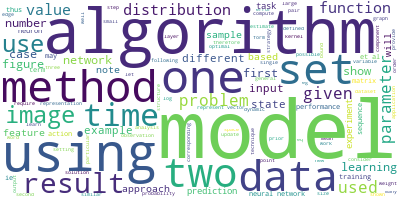

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

LDA Analysis

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1])
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['eeg', 'graph', 'factor', 'graph', 'based', 'model', 'capturing', 'spatial', 'temporal', 'observational', 'relationships', 'yogatheesan', 'varatharajah', 'benjamin', 'brinkmann', 'min', 'jin', 'chong', 'krishnakant', 'saboo', 'gregory', 'worrell', 'brent', 'berry', 'ravishankar', 'iyer', 'abstract', 'paper', 'presents', 'probabilistic', 'graphical', 'model', 'used', 'infer', 'characteristics', 'instantaneous', 'brain', 'activity', 'jointly', 'analyzing', 'spatial', 'temporal', 'dependencies', 'observed', 'eeg', 'specifically', 'describe', 'factor', 'graph', 'based', 'model', 'customized', 'factor', 'functions', 'defined', 'based', 'domain', 'knowledge', 'infer', 'pathologic', 'brain', 'activity', 'goal', 'identifying', 'seizure', 'generating', 'brain', 'regions', 'epilepsy', 'patients', 'utilize', 'inference', 'technique', 'based', 'graph', 'cut', 'algorithm', 'exact

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])
print(texts[:1])
print(corpus[:1][0][:30])

[[(0, 1), (1, 1), (2, 29), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 3), (13, 7), (14, 1), (15, 6), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 19), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 4), (37, 1), (38, 7), (39, 1), (40, 2), (41, 8), (42, 1), (43, 1), (44, 1), (45, 6), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 4), (58, 7), (59, 2), (60, 2), (61, 1), (62, 25), (63, 13), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 2), (70, 2), (71, 1), (72, 3), (73, 1), (74, 1), (75, 1), (76, 4), (77, 3), (78, 2), (79, 1), (80, 1), (81, 6), (82, 4), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 2), (89, 9), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 35), (103, 1), (104, 2), (105, 1), (106, 1), (107, 1), (108, 1), (109, 4), (11

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"learning" + 0.005*"model" + 0.004*"data" + 0.003*"training" + '
  '0.003*"using" + 0.003*"set" + 0.003*"number" + 0.003*"two" + 0.003*"one" + '
  '0.003*"function"'),
 (1,
  '0.010*"model" + 0.006*"learning" + 0.006*"data" + 0.005*"set" + '
  '0.004*"algorithm" + 0.004*"one" + 0.003*"function" + 0.003*"two" + '
  '0.003*"time" + 0.003*"neural"'),
 (2,
  '0.005*"learning" + 0.005*"model" + 0.004*"two" + 0.004*"state" + '
  '0.004*"time" + 0.004*"set" + 0.003*"using" + 0.003*"function" + 0.003*"one" '
  '+ 0.003*"training"'),
 (3,
  '0.008*"model" + 0.007*"learning" + 0.006*"data" + 0.005*"time" + '
  '0.005*"using" + 0.004*"function" + 0.003*"figure" + 0.003*"xt" + '
  '0.003*"models" + 0.003*"algorithm"'),
 (4,
  '0.006*"learning" + 0.005*"model" + 0.005*"data" + 0.004*"using" + '
  '0.004*"set" + 0.004*"number" + 0.003*"algorithm" + 0.003*"one" + '
  '0.003*"two" + 0.003*"also"'),
 (5,
  '0.008*"model" + 0.005*"data" + 0.005*"time" + 0.004*"using" + '
  '0.004*"learning

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
if os.path.isdir("/content/results") == False:
  os.mkdir("/content/results")
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/results/ldavis_prepared_'+ str(num_topics) +'.html')

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './content/results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.000733 -0.001130       1        1  19.631787
1     -0.008393  0.006393       2        1  14.607610
3      0.001270  0.002795       3        1  13.899239
9      0.010960  0.000988       4        1  12.744120
8     -0.005170  0.003499       5        1  10.023747
7     -0.007648 -0.012045       6        1   8.825570
4     -0.000532 -0.000228       7        1   6.892835
2      0.001962 -0.000239       8        1   6.680315
6      0.001517  0.006667       9        1   5.272783
0      0.006766 -0.006701      10        1   1.421993, topic_info=              Term         Freq        Total Category  logprob  loglift
1450      learning  1399.000000  1399.000000  Default  30.0000  30.0000
675          model  1835.000000  1835.000000  Default  29.0000  29.0000
943            set   905.000000   905.000000  Default  28.0000  28.0000
237           data  1263.000000  1263.000000  Default  27.0000  27.0000
1656      training   638.000000   638.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
398         figure     7.953292   731.645516  Topic10  -6.1160  -0.2686
2564         image     7.152623   568.670696  Topic10  -6.2221  -0.1227
898        results     6.972107   550.009840  Topic10  -6.2477  -0.1149
609            log     6.674287   554.928034  Topic10  -6.2913  -0.1675
297   distribution     6.765397   681.889410  Topic10  -6.2778  -0.3599

[882 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2000      2  0.171118     abibc
2000      3  0.171118     abibc
2000      4  0.171118     abibc
2000      5  0.342236     abibc
2         1  0.141798  abnormal
...     ...       ...       ...
5422      6  0.047899        zt
5422      7  0.047899        zt
5422      8  0.063865        zt
5422      9  0.031933        zt
5422     10  0.015966        zt

[4182 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 4, 10, 9, 8, 5, 3, 7, 1])

In [ ]:
pip install pandas --upgrade

In [ ]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('/content/lda.csv')
# Print head
print(papers.columns)

Index(['id', 'title', 'event_type', 'pdf_name', 'abstract', 'paper_text'], dtype='object')


In [ ]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)
# Print out the first rows of papers
print(papers)

                                               title  ...                                         paper_text
0  School Closures Tick Up as COVID-19 Caseloads ...  ...  Due to mounting COVID-19 cases in K-12 schools...
1  Courts Block Two Biden Administration COVID Va...  ...  By Tom Hals\n\n(Reuters) -The Biden administra...
2  Fauci Says COVID Diverted Resources From Fight...  ...  UNITED NATIONS (AP) — Dr. Anthony Fauci, the t...
3  Biden Urges Calm Over Omicron COVID-19 Variant...  ...  President Joe Biden on Monday pledged that the...
4  U.S. COVID Cases, Hospitalizations on the Rise...  ...  By Robert Preidt and Robin Foster, HealthDay R...
5  Arkansas Sees Its Biggest COVID-19 Case Jump S...  ...  LITTLE ROCK, Ark. (AP) — Arkansas reported mor...
6                   FDA Panel Endorses COVID-19 Pill  ...  A panel of experts gathered by the Food and Dr...
7             Places Without Reported COVID-19 Cases  ...  These Places Have No Reported COVID-19 Cases\n...
8  COVID-19 Vaccina

In [ ]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-30-7a1a7a1d4347>:4: DeprecationWarning: invalid escape sequence \.
  papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))


0    due to mounting covid-19 cases in k-12 schools...
1    by tom hals\n\n(reuters) -the biden administra...
2    united nations (ap) — dr anthony fauci the top...
3    president joe biden on monday pledged that the...
4    by robert preidt and robin foster healthday re...
Name: paper_text_processed, dtype: object

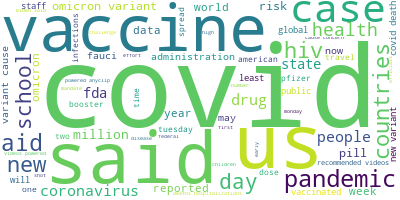

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])
print(texts[:1])
# View
print(corpus[:1][0][:30])

[[(0, 1), (1, 1), (2, 29), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 3), (13, 7), (14, 1), (15, 6), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 19), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 4), (37, 1), (38, 7), (39, 1), (40, 2), (41, 8), (42, 1), (43, 1), (44, 1), (45, 6), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 4), (58, 7), (59, 2), (60, 2), (61, 1), (62, 25), (63, 13), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 2), (70, 2), (71, 1), (72, 3), (73, 1), (74, 1), (75, 1), (76, 4), (77, 3), (78, 2), (79, 1), (80, 1), (81, 6), (82, 4), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 2), (89, 9), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 35), (103, 1), (104, 2), (105, 1), (106, 1), (107, 1), (108, 1), (109, 4), (11

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers['paper_text_processed'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['due', 'mounting', 'covid', 'cases', 'schools', 'chronic', 'staff', 'shortages', 'impacting', 'every', 'area', 'district', 'operations', 'schools', 'michigan', 'city', 'ann', 'arbor', 'closed', 'entire', 'week', 'thanksgiving', 'effort', 'interrupt', 'transmission', 'allow', 'staff', 'ample', 'time', 'recover']


In [ ]:
from pprint import pprint
# number of topics
print(papers['paper_text_processed'])
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

0    due to mounting covid-19 cases in k-12 schools...
1    by tom hals\n\n(reuters) -the biden administra...
2    united nations (ap) — dr anthony fauci the top...
3    president joe biden on monday pledged that the...
4    by robert preidt and robin foster healthday re...
5    little rock ark (ap) — arkansas reported more ...
6    a panel of experts gathered by the food and dr...
7    these places have no reported covid-19 cases\n...
8    the emergency authorizations of several covid-...
Name: paper_text_processed, dtype: object


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.007*"model" + 0.005*"learning" + 0.004*"two" + 0.003*"time" + 0.003*"set" '
  '+ 0.003*"one" + 0.003*"data" + 0.003*"input" + 0.003*"figure" + '
  '0.003*"network"'),
 (1,
  '0.007*"model" + 0.005*"data" + 0.004*"learning" + 0.004*"using" + '
  '0.004*"two" + 0.004*"time" + 0.004*"function" + 0.003*"number" + '
  '0.003*"algorithm" + 0.003*"one"'),
 (2,
  '0.008*"model" + 0.006*"learning" + 0.005*"data" + 0.005*"algorithm" + '
  '0.004*"time" + 0.004*"using" + 0.004*"set" + 0.004*"function" + 0.003*"one" '
  '+ 0.003*"also"'),
 (3,
  '0.006*"data" + 0.006*"model" + 0.005*"time" + 0.005*"using" + '
  '0.005*"learning" + 0.004*"set" + 0.004*"function" + 0.004*"figure" + '
  '0.003*"two" + 0.003*"one"'),
 (4,
  '0.008*"model" + 0.007*"learning" + 0.006*"data" + 0.004*"set" + 0.004*"one" '
  '+ 0.004*"also" + 0.004*"function" + 0.003*"models" + 0.003*"time" + '
  '0.003*"algorithm"'),
 (5,
  '0.007*"xt" + 0.006*"model" + 0.005*"learning" + 0.005*"time" + '
  '0.004*"algorithm" + 

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
if os.path.isdir("/content/results") == False:
  os.mkdir("/content/results")
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/results/ldavis_prepared_'+ str(num_topics) +'.html')

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './content/results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.012777 -0.002302       1        1  18.179951
1     -0.002963 -0.000835       2        1  11.276624
8     -0.000197 -0.000694       3        1  10.113928
9     -0.002970 -0.000778       4        1  10.025959
3      0.001156  0.001510       5        1   9.974586
6     -0.004978  0.001366       6        1   9.738628
4     -0.001619 -0.005200       7        1   9.528736
2     -0.007608  0.006333       8        1   8.452973
7     -0.000718 -0.008300       9        1   7.386784
0      0.007119  0.008899      10        1   5.321830, topic_info=           Term         Freq        Total Category  logprob  loglift
675       model  1741.000000  1741.000000  Default  30.0000  30.0000
1450   learning  1415.000000  1415.000000  Default  29.0000  29.0000
4334         xt   578.000000   578.000000  Default  28.0000  28.0000
237        data  1227.000000  1227.000000  Default  27.0000  27.0000
2564      image   544.000000   544.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
29    algorithm    33.751179   957.213850  Topic10  -5.9904  -0.4117
1096      using    31.455323  1007.923374  Topic10  -6.0608  -0.5337
4334         xt    26.637264   578.574242  Topic10  -6.2271  -0.1449
425    function    28.340104   820.480855  Topic10  -6.1651  -0.4323
446       given    26.108918   560.605797  Topic10  -6.2471  -0.1334

[865 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
10872      1  0.155072  abbeel
10872      2  0.155072  abbeel
10872      3  0.155072  abbeel
10872      4  0.155072  abbeel
10872      5  0.310143  abbeel
...      ...       ...     ...
9988       2  0.149660     zij
9988       3  0.149660     zij
9988       4  0.149660     zij
9988       6  0.149660     zij
9988       9  0.149660     zij

[4060 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 9, 10, 4, 7, 5, 3, 8, 1])